# Assignment - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [ ]:
# stundent details example: John S. 9812
#                       student details 1: Kiril L. 7613
# (if exists)           student details 2: 
# (if exists)           student details 3: 
# (if exists)           student details 4: 

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: ChatGPT 5
Goal:
Propmpt1: What the problem with the ParameterGrid? thats the error "..."
    
Propmpt2: Thats my code "...", i want to order that with explains, and easy reading.
    
Propmpt3: Add Plot bar chart of feature importance


AI agent name 2: Claude Sonnet 4
Goal:
Propmpt1: try to add something that can to improve my training.
    
Propmpt2: 
    
Propmpt3: 

Other assistanse:    
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>
In this project we deal with a regression problem, predicting a numerical value. 
The goal is to estimate the median house value in a given area of California. 
For each area we have information such as median income, average house age, number of rooms, number of occupants,
population size, and the geographical location (latitude and longitude).
Using these features, we train a model to learn the relationship between the characteristics of an area and its house prices,
so that it can predict prices for new, unseen areas.



    
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

# Load train and test sets
train_df = pd.read_csv("housing_train.csv")
test_df = pd.read_csv("housing_test.csv")

# first sanity checks
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

display(train_df.head())
display(test_df.head())


# Checking missing values in train and test sets

# Train set
train_missing = train_df.isnull().sum()
print("Missing values in Train set:")
print(train_missing[train_missing > 0] if train_missing.any() else "No missing values found.")

# Test set
test_missing = test_df.isnull().sum()
print("\nMissing values in Test set:")
print(test_missing[test_missing > 0] if test_missing.any() else "No missing values found.")

# Checking for duplicate rows in Train and Test sets

# For the Train set:
dup_train = train_df.duplicated().sum()
print("Number of duplicate rows in Train set:", dup_train)

# For the Test set:
dup_test = test_df.duplicated().sum()
print("Number of duplicate rows in Test set:", dup_test)

Train shape: (16512, 9)
Test shape: (4128, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,4.0179,46.0,4.158690,1.032746,512.0,1.289673,34.07,-118.35,3.500
1,2.7002,6.0,4.149245,1.179989,4092.0,2.287311,34.05,-117.31,0.883
2,1.2762,17.0,3.432331,1.022556,1325.0,2.490602,34.42,-119.69,2.536
3,4.9342,23.0,5.735798,1.053201,4580.0,4.129847,34.04,-117.93,1.810
4,2.2755,21.0,4.064607,0.962079,2109.0,2.962079,32.58,-117.11,1.250


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,5.3254,32.0,5.786260,1.033079,982.0,2.498728,34.29,-119.27,3.852
1,5.3032,52.0,5.095745,1.028369,980.0,3.475177,34.08,-118.12,2.457
2,4.1679,41.0,6.617486,1.371585,915.0,2.500000,37.05,-122.05,2.013
3,3.6429,28.0,5.249180,1.009836,848.0,2.780328,38.69,-121.41,1.052
4,2.7457,17.0,11.183267,2.107570,675.0,2.689243,38.88,-119.99,1.078


Missing values in Train set:
No missing values found.

Missing values in Test set:
No missing values found.
Number of duplicate rows in Train set: 0
Number of duplicate rows in Test set: 0


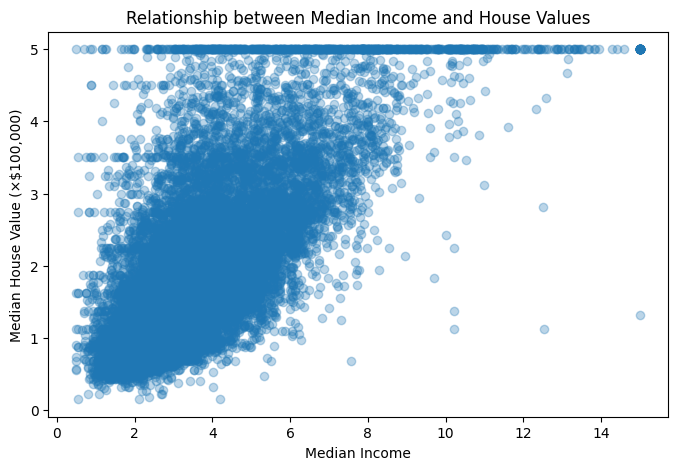

In [48]:
# 1. Scatter plot: Median Income vs Median House Value
plt.figure(figsize=(8,5))
plt.scatter(train_df["MedInc"], train_df["MedHouseVal"], alpha=0.3)
plt.title("Relationship between Median Income and House Values")
plt.xlabel("Median Income")
plt.ylabel("Median House Value (×$100,000)")
plt.show()

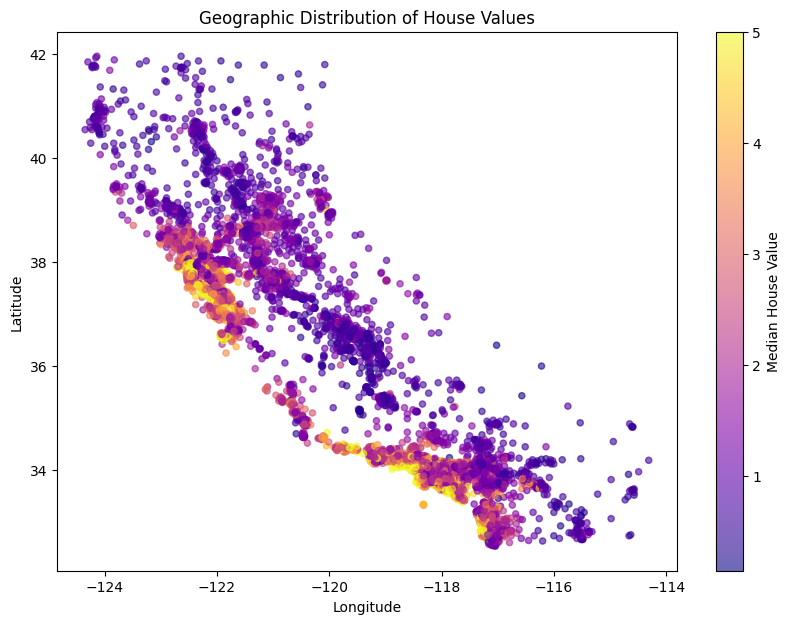

In [49]:
# 2. Scatter plot: Location (Latitude × Longitude) colored by House Value
plt.figure(figsize=(10,7))
scatter = plt.scatter(train_df["Longitude"], train_df["Latitude"], 
                     c=train_df["MedHouseVal"], cmap="plasma", 
                     alpha=0.6, s=20)
plt.colorbar(scatter, label="Median House Value")
plt.title("Geographic Distribution of House Values")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [34]:

import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import ParameterGrid
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import r2_score

# Machine Learning Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


# Load data 

target = "MedHouseVal"
X_train = train_df.drop(columns=[target])
y_train = train_df[target]
X_test  = test_df.drop(columns=[target])
y_test  = test_df[target]


# 1) Build generic pipeline
# -----------------------------
pipe = Pipeline(steps=[
    ("preprocess", "passthrough"),     # StandardScaler or none (feature engineering)
    ("model", RandomForestRegressor(random_state=42, n_jobs=-1)) 
])


In [35]:
# 2) Define search space and cross-validation setup
# -----------------------------

# Feature Engineering options - at least one configuration with/without
preprocess_options = ["passthrough", StandardScaler()]

# Single algorithm with at least 2 hyperparameters, 2 values each
param_grid = {
    "preprocess": preprocess_options,              # Feature engineering
    "model__n_estimators": [100, 300],             # Hyperparameter 1: 2 values  
    "model__max_depth": [None, 12],                # Hyperparameter 2: 2 values
}

# Cross-validation setup (5-fold)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [36]:
# 3) Execute Grid Search with R² scoring
# -----------------------------
print("Starting Grid Search with 5-fold Cross Validation...")
print(f"Total number of combinations: {len(list(ParameterGrid(param_grid)))}")

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=cv,
    scoring="r2",
    n_jobs=1,                          # Changed to 1 to avoid parallel issues
    return_train_score=True,
    verbose=1
)

grid.fit(X_train, y_train)

Starting Grid Search with 5-fold Cross Validation...
Total number of combinations: 8
Fitting 5 folds for each of 8 candidates, totalling 40 fits


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'model__max_depth': [None, 12], 'model__n_estimators': [100, 300], 'preprocess': ['passthrough', StandardScaler()]}"
,scoring,'r2'
,n_jobs,1
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,copy,True


In [37]:
# 4) Display all results and identify best combination
# -----------------------------
results_df = pd.DataFrame(grid.cv_results_)

# Important columns to display
cols_to_show = [
    "rank_test_score",
    "mean_test_score",          # Average R² on validation (5-fold average)
    "std_test_score",           # Standard deviation across folds
    "mean_train_score",         # Average R² on train
    "param_preprocess",
    "param_model__n_estimators",
    "param_model__max_depth",
]

# Filter only existing columns and sort by rank (best first)
cols_to_show = [c for c in cols_to_show if c in results_df.columns]
results_pretty = results_df.sort_values("rank_test_score")[cols_to_show].reset_index(drop=True)

print("\n=== All combination results (5-fold CV average, higher R² = better) ===")
display(results_pretty.head(10))  # All combinations (should be 8 total)

print("\n=== Best combination (by CV R² average) ===")
print(f"Best R² (CV): {grid.best_score_:.4f}")
print(f"Best parameters: {grid.best_params_}")

# Detailed parameter breakdown
print("\nBest parameters breakdown:")
for param, value in grid.best_params_.items():
    print(f"  {param}: {value}")


=== All combination results (5-fold CV average, higher R² = better) ===


,rank_test_score,mean_test_score,std_test_score,mean_train_score,param_preprocess,param_model__n_estimators,param_model__max_depth
0,1,0.802775,0.015298,0.972775,StandardScaler(),300,None
1,2,0.802731,0.015270,0.972782,passthrough,300,None
2,3,0.801173,0.015522,0.972015,StandardScaler(),100,None
3,4,0.801127,0.015449,0.972017,passthrough,100,None
4,5,0.792141,0.016004,0.923751,StandardScaler(),300,12
5,6,0.792118,0.015968,0.923757,passthrough,300,12
6,7,0.791335,0.016102,0.923371,passthrough,100,12
7,8,0.791321,0.016156,0.923369,StandardScaler(),100,12



=== Best combination (by CV R² average) ===
Best R² (CV): 0.8028
Best parameters: {'model__max_depth': None, 'model__n_estimators': 300, 'preprocess': StandardScaler()}

Best parameters breakdown:
  model__max_depth: None
  model__n_estimators: 300
  preprocess: StandardScaler()


In [38]:
# 5) Train final model and evaluate on test set
# -----------------------------
best_model = grid.best_estimator_
print(f"\nTraining best model on full trainset...")

# Evaluate performance on test-set
y_pred_test = best_model.predict(X_test)
test_r2 = r2_score(y_test, y_pred_test)

print(f"\n=== Performance on test-set ===")
print(f"R² on test: {test_r2:.4f}")

# Compare CV vs test performance
print(f"R² on CV (validation): {grid.best_score_:.4f}")
print(f"R² on test: {test_r2:.4f}")
print(f"Difference: {abs(grid.best_score_ - test_r2):.4f}")



Training best model on full trainset...

=== Performance on test-set ===
R² on test: 0.8269
R² on CV (validation): 0.8028
R² on test: 0.8269
Difference: 0.0241


In [39]:
# 6) Summary and sample predictions
# -----------------------------
# Show some predictions vs actual values
print("\n=== Sample predictions vs actual values ===")
comparison_df = pd.DataFrame({
    "y_true": y_test.values, 
    "y_pred": y_pred_test,
    "difference": y_test.values - y_pred_test
})
display(comparison_df.head(10))

print(f"\nSummary: Tested {len(results_df)} different combinations using 5-fold Cross Validation")
print("Requirements fulfilled:")
print("✓ Quality metric: R² for regression problems") 
print("✓ Feature engineering: StandardScaler with/without configuration")
print("✓ Single algorithm: RandomForestRegressor")
print("✓ Hyperparameters: n_estimators (2 values) + max_depth (2 values)")
print("✓ Grid search: Cartesian product of all combinations")
print("✓ 5-fold CV: Each combination tested 5 times, average calculated")
print("✓ Best combination selected based on highest average CV score")


=== Sample predictions vs actual values ===


,y_true,y_pred,difference
0,3.852,3.369640,0.482360
1,2.457,2.422797,0.034203
2,2.013,2.618493,-0.605493
3,1.052,1.127083,-0.075083
4,1.078,1.209003,-0.131003
5,0.580,0.615653,-0.035653
6,3.750,3.204034,0.545966
7,1.135,1.166630,-0.031630
8,1.568,1.581267,-0.013267
9,1.917,1.932094,-0.015094



Summary: Tested 8 different combinations using 5-fold Cross Validation
Requirements fulfilled:
✓ Quality metric: R² for regression problems
✓ Feature engineering: StandardScaler with/without configuration
✓ Single algorithm: RandomForestRegressor
✓ Hyperparameters: n_estimators (2 values) + max_depth (2 values)
✓ Grid search: Cartesian product of all combinations
✓ 5-fold CV: Each combination tested 5 times, average calculated
✓ Best combination selected based on highest average CV score


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [54]:
from sklearn.base import clone
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Final Training

from sklearn.base import clone

print("=== Final Training Stage ===")

# Take the best model from GridSearch
best_model = grid.best_estimator_

# Train again on all training data
final_model = clone(best_model)
final_model.fit(X_train, y_train)

print("✓ Training finished successfully on the full training set")



=== Final Training Stage ===
✓ Training finished successfully on the full training set


In [55]:

# Evaluation on Test Set

from sklearn.metrics import r2_score

print("=== Test Set Evaluation ===")

# Predict on test set
y_pred_test = final_model.predict(X_test)

# Calculate R² score
test_r2 = r2_score(y_test, y_pred_test)

print(f"R² score on test set: {test_r2:.4f}")



=== Test Set Evaluation ===
R² score on test set: 0.8269



=== Feature Importance ===
      Feature  Importance
0      MedInc    0.514935
5    AveOccup    0.141797
6    Latitude    0.092124
7   Longitude    0.090747
1    HouseAge    0.053664
2    AveRooms    0.044727
4  Population    0.032275
3   AveBedrms    0.029729


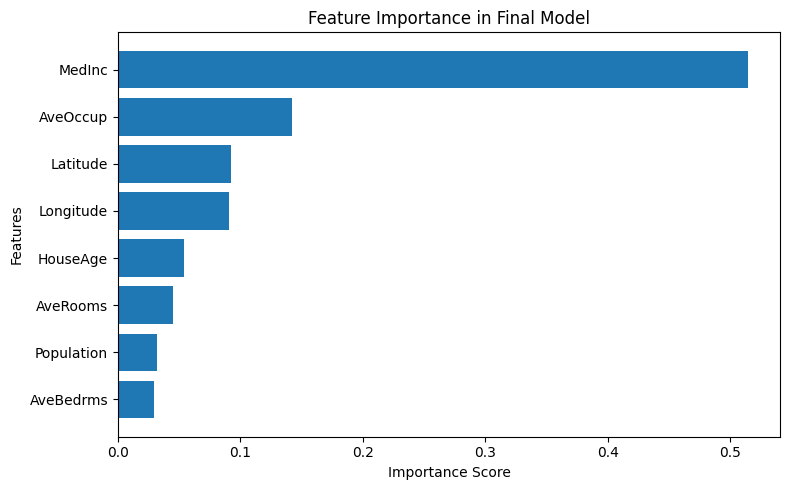

In [56]:
# Feature Importance
print("\n=== Feature Importance ===")

# Directly get feature importances
importances = final_model.named_steps["model"].feature_importances_
features = X_train.columns

# Create table of features sorted by importance
importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values("Importance", ascending=False)

print(importance_df)

# Plot bar chart of feature importance
plt.figure(figsize=(8,5))
indices = np.argsort(importances)[::-1]
plt.barh(range(len(importances)), importances[indices])
plt.yticks(range(len(importances)), features[indices])
plt.title("Feature Importance in Final Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.gca().invert_yaxis()  # Most important feature at the top
plt.tight_layout()
plt.show()

## Part 5 - Apply on test and show model performance estimation

In [57]:
# Model Setup and Test Predictions

print("=== Model Setup and Test Set Predictions ===")

# Use the final trained model directly
final_model = final_model  # assume already defined in previous stage

# Display model configuration
print(f"\nFinal Model Configuration:")
print(f"• Pipeline steps: {[step[0] for step in final_model.steps]}")
print(f"• Model type: {type(final_model.named_steps['model']).__name__}")

# Generate predictions on test set
print(f"\nGenerating predictions on test set ({len(X_test)} samples)...")
y_pred_test = final_model.predict(X_test)
print("✓ Test set predictions completed")

# Display first 10 predictions
print(f"\n=== Sample Predictions (First 10 Examples) ===")
sample_results = pd.DataFrame({
    "True_Value": y_test.values,
    "Predicted_Value": y_pred_test,
    "Prediction_Error": y_test.values - y_pred_test,
    "Absolute_Error": np.abs(y_test.values - y_pred_test)
})

print(sample_results.head(10).to_string(index=False, float_format='%.3f'))


=== Model Setup and Test Set Predictions ===

Final Model Configuration:
• Pipeline steps: ['preprocess', 'model']
• Model type: RandomForestRegressor

Generating predictions on test set (4128 samples)...
✓ Test set predictions completed

=== Sample Predictions (First 10 Examples) ===
 True_Value  Predicted_Value  Prediction_Error  Absolute_Error
      3.852            3.370             0.482           0.482
      2.457            2.423             0.034           0.034
      2.013            2.618            -0.605           0.605
      1.052            1.127            -0.075           0.075
      1.078            1.209            -0.131           0.131
      0.580            0.616            -0.036           0.036
      3.750            3.204             0.546           0.546
      1.135            1.167            -0.032           0.032
      1.568            1.581            -0.013           0.013
      1.917            1.932            -0.015           0.015


In [58]:
# Quality Assessment and Performance Analysis (Simplified)

print("\n=== Quality Assessment using R² Metric ===")

# R² score on test set
test_r2 = r2_score(y_test, y_pred_test)
print(f"R² Score on Test Set: {test_r2:.4f}")

# Compare with CV best score
cv_best_score = grid.best_score_
performance_gap = abs(cv_best_score - test_r2)

print("\n=== Performance Comparison ===")
print(f"Best CV R² (5-fold average): {cv_best_score:.4f}")
print(f"Test Set R²: {test_r2:.4f}")
print(f"Performance Gap: {performance_gap:.4f}")

# Interpretation of gap
if performance_gap < 0.05:
    print("Good generalization (small gap between CV and test)")
else:
    print("Possible overfitting (test lower than CV)")

# Additional metrics
mae = np.mean(np.abs(y_test.values - y_pred_test))
rmse = np.sqrt(np.mean((y_test.values - y_pred_test) ** 2))
median_error = np.median(np.abs(y_test.values - y_pred_test))

print("\n=== Additional Quality Metrics ===")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Square Error (RMSE): {rmse:.4f}")
print(f"Median Absolute Error: {median_error:.4f}")

# Simple quality interpretation based on R²
if test_r2 >= 0.8:
    quality_level = "Good"
elif test_r2 >= 0.6:
    quality_level = "Moderate"
else:
    quality_level = "Needs Improvement"

print("\n=== Final Quality Assessment ===")
print(f"Model Quality Level: {quality_level}")
print(f"Model explains {test_r2*100:.1f}% of target variance")



=== Quality Assessment using R² Metric ===
R² Score on Test Set: 0.8269

=== Performance Comparison ===
Best CV R² (5-fold average): 0.8028
Test Set R²: 0.8269
Performance Gap: 0.0241
Good generalization (small gap between CV and test)

=== Additional Quality Metrics ===
Mean Absolute Error (MAE): 0.3172
Root Mean Square Error (RMSE): 0.4846
Median Absolute Error: 0.2025

=== Final Quality Assessment ===
Model Quality Level: Good
Model explains 82.7% of target variance
